# <u>**Housing Price Prediction**</u>

In this notebook, we will explore, clean, preprocess, and predict housing prices and submit the predicted values to Kaggle's ongoing Housing Price Prediction competition

## <u>**Content**</u>

- [1 - Import Modules](#1---import-modules)
- [2 - Import Datasets](#2---import-datasets)
- [3 - Explore Data](#3---explore-data)
- [4 - Handling Null Values](#4---handling-null-values)
- [5 - EDA and Feature Engineering](#5---eda-and-feature-engineering)
- [6 - Preprocessing](#6---preprocessing)
- [7 - Cross Validation and Hyperparameter Tuning](#7---cross-validation-and-hyperparameter-tuning)
- [8 - Train Model](#8---train-model)
- [9 - Prediction](#9---prediction)

<a id="1"></a>
### 1 - Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import numpy as np

pd.set_option('display.max_columns', None)

<a id="2"></a>
### 2 - Import Datasets

In [2]:
train = pd.read_csv('train.csv').set_index('Id')
test = pd.read_csv('test.csv').set_index('Id')

<a id="3"></a>
### 3 - Explore Data

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Calling the describe function will allow us to get a quick glimpse at various statistics of the dataset

In [4]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Calling the info function will allow us to better understand the type of data found in the dataset as well as the overall size of our dataset

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

<a id="4"></a>
### 4 - Handling Null Values

For this dataset, we will handle missing null values by removing columns that have more than 50% of the data missing from them. Later, we will impute missing values based on the data type.

In [6]:
drop_cols = (train.isna().sum().sort_values(ascending=False) / len(train) > 0.5).index[:5]

train.drop(drop_cols, axis=1, inplace=True)

<a id="5"></a>
### 5 - EDA and Feature Engineering

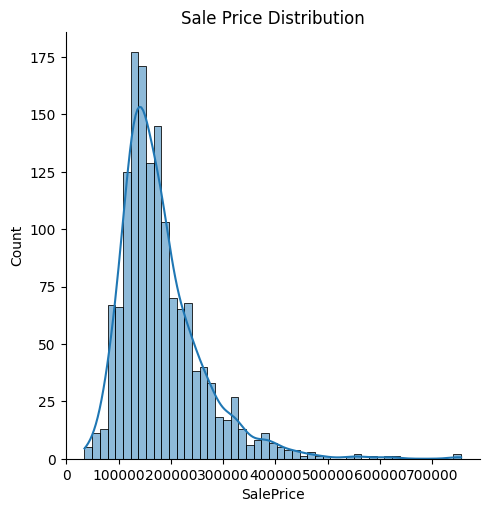

In [7]:
sns.displot(data=train.SalePrice, kde=True)
plt.title('Sale Price Distribution')
plt.show()

From the graph above, we can see that our target variable, SalePrice, is right-skewed. For machine learning purposes, we typically want our target variable to have a normal distribution so that the model's performance is not negatively affected by outliers in the actual target values. To get the target variable to have a normal distribution, we can apply take the logarithmic value of the SalePrice column. This effectively reduces the large variance between the data points. For example, if we had values of 10, 100, and 1000, taking the logarithm of each value would return 1, 2, and 3; thereby minimizing the difference between each value.

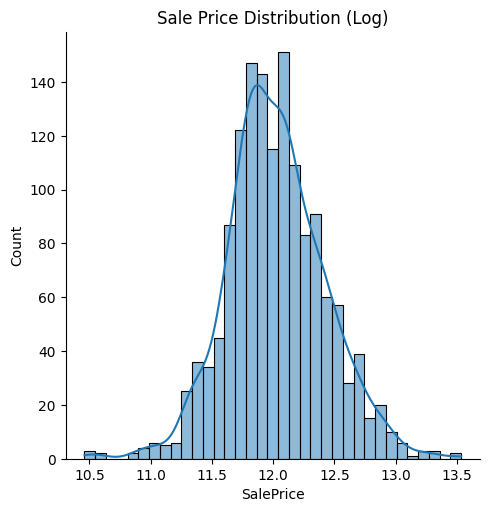

In [8]:
sns.displot(data=np.log(train.SalePrice), kde=True)
plt.title('Sale Price Distribution (Log)')
plt.show()

Running the cell below will return graphs of every single object column in relation to the target variable. Doing this will highlight various patterns and relationships that we can exploit by creating additional features

In [9]:
# for col in train.select_dtypes(include=['object']).columns:
#     sns.barplot(data=train, x=col, y='SalePrice')
#     plt.title(col)
#     plt.show()

In [ ]:
def create_features(df):
    df['ExBsmt'] = df['BsmtQual'] == 'Ex'
    df['ExExter'] = df['ExterQual'] == 'Ex'
    df['PosCond'] = df.loc[:, 'Condition2'].isin(['PosN', 'PosA'])
    df['WdRoof'] = df['RoofMatl'] = 'WdShngl'
    df['GQBsmtFinType1'] = df['BsmtFinType1'] == 'GQ'
    df['ExHeating'] = df['HeatingQC'] == 'Ex'
    df['SBrkr'] = df['Electrical'] == 'SBrkr'
    df['ExKitchenQual'] = df['KitchenQual'] == 'Ex'
    df['ExFireplaceQu'] = df['FireplaceQu'] == 'Ex'
    df['BuiltinGar'] = df['GarageType'] == 'Builtin'
    df['Partial'] = df['SaleCondition'] == 'Partial'
    return df

In [11]:
train = create_features(train)

In [12]:
# Creating lists of categorical and numerical columns

object_cols = train.select_dtypes(include=['object']).columns
num_cols = [col for col in train if train[col].dtype in ['bool', 'float64', 'int64'] and col != 'SalePrice']

In [13]:
# Creating a correlation matrix of all numerical columns including SalePrice to see how correlated the numerical features are to the target variable

corr = train[num_cols+['SalePrice']].corr()

In [ ]:
# Top 10 most correlated numerical columns, notice one of the created features is in this list; a good sign that creating those features could prove useful

corr['SalePrice'].sort_values(ascending=False)[1:10]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
ExBsmt          0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

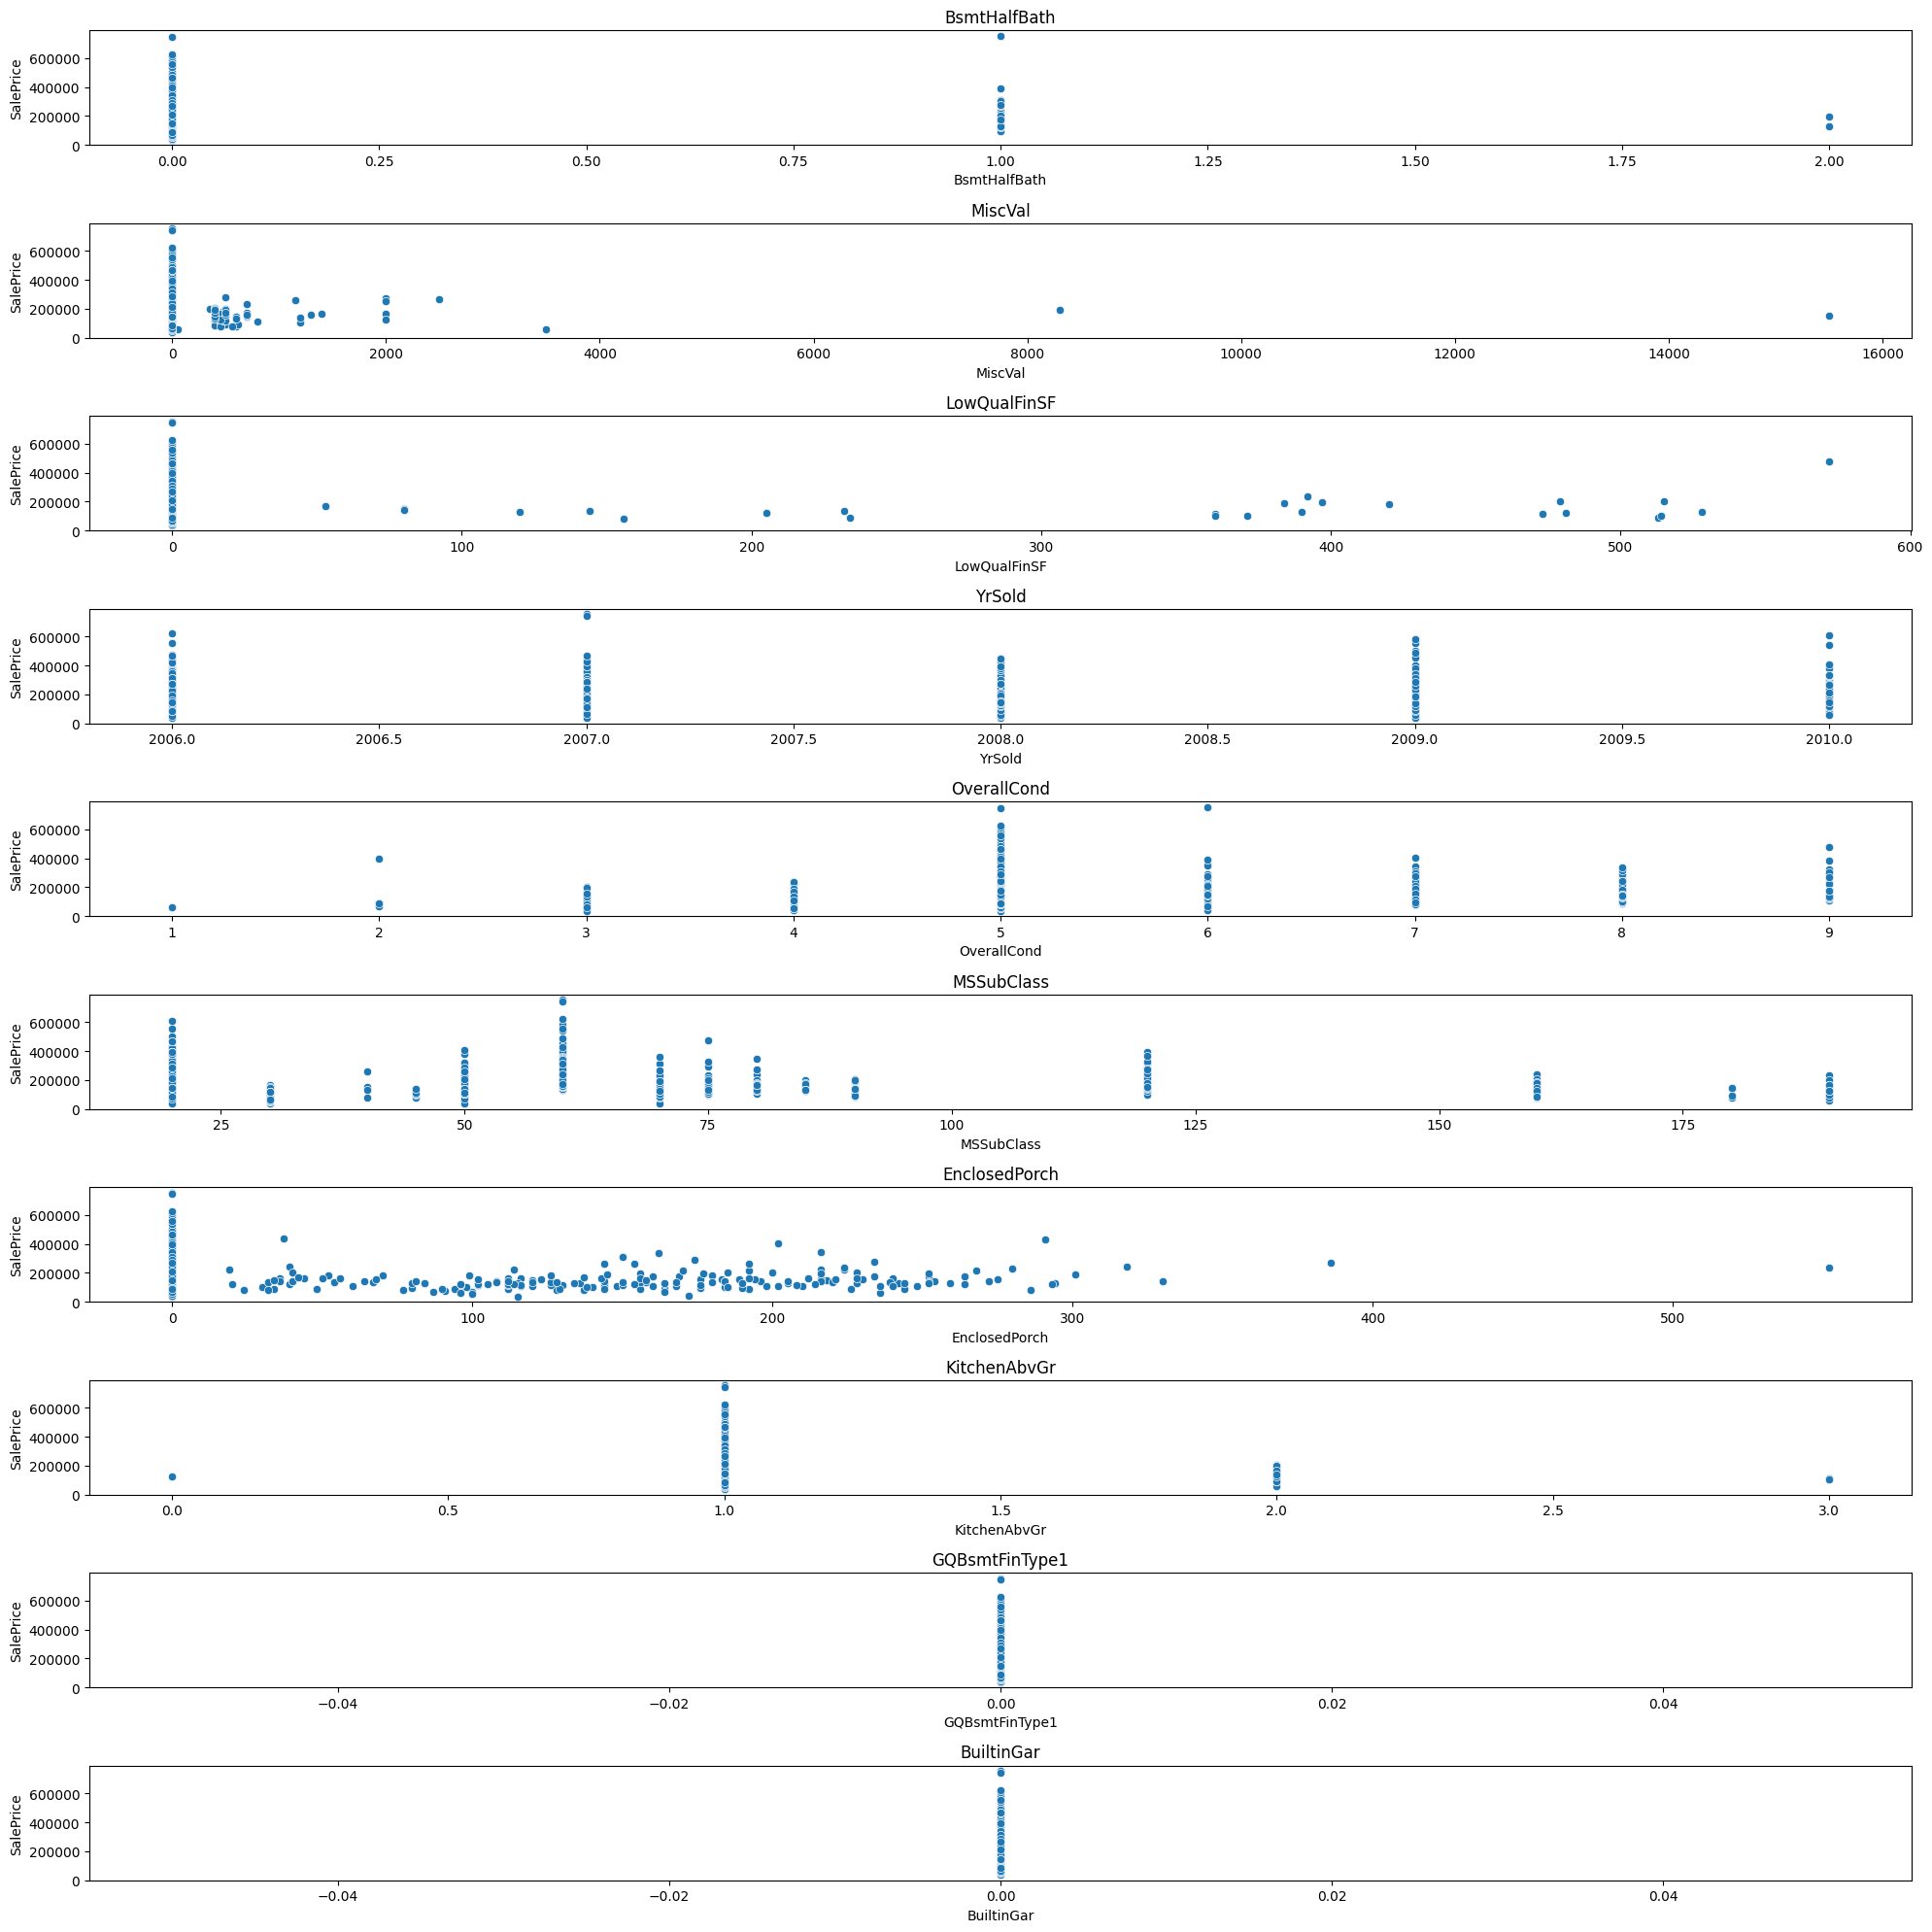

In [15]:
# Plotting the bottom 10 correlated numerical columns

fig, axs = plt.subplots(10,1,figsize=(20, 20))

for idx, col in enumerate(corr['SalePrice'].sort_values(ascending=False)[-10:].index):
    sns.scatterplot(data=train, y='SalePrice', x=col, ax=axs[idx])
    axs[idx].set_title(col)

plt.tight_layout()
plt.show()

From the graphs above, we can see that many of the columns that are least correlated with SalePrice have outlier values in them. To combat this, we'll remove some of these outlier values from the dataset to hopefully minimize the effect of these negatively correlated features.

In [16]:
train = train[
    (train['BsmtHalfBath'] < 2) &
    (train['MiscVal'] <= 2000) &
    (train['OverallCond'] > 2) &
    (train['EnclosedPorch'] < 350) &
    ((train['KitchenAbvGr'] > 0) & (train['KitchenAbvGr'] < 3))
    ]

In the following cell, the categorical columns are split between **ordinal** and **nominal** variables.

- <u>**Ordinal**</u>: The values have a set order to them (Ex. Excellent, Good, Poor)
- <u>**Nominal**</u>: The values have no clearly defined order to them (Ex. Blue, Orange, Red)

This step requires a combination of domain knowledge and careful examination of the values in each column. The Kaggle competition that this notebook is based on has a breakdown of all the values found in these categorical columns, so I'd highly recommend reviewing that information and determine for yourself which column belongs to which group.

In [ ]:
ordinal_vars = [
    'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
    'SaleCondition'
]

nominal_vars = [
    'MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Foundation', 'Heating', 'Electrical', 'GarageType', 'SaleType'
]

<a id="6"></a>
### 6 - Preprocessing

In [18]:
# Splitting the training set into the feature and target variables, also, as discussed, applying the logarithm to the target variable

x_train = train.copy().drop('SalePrice', axis=1)
y_train = np.log(train.SalePrice)

In the following cell, the data will be preprocessed, missing values will be imputed based on their data type and categorical columns will be encoded so that the model and interpret their values.

- SimpleImputer will impute missing data with the values indicated by the strategy argument. For numerical columns the ``median`` value will be used and for the categorical columns the ``most_frequent`` value will be used.
- StandardScaler will normalize numerical data so that the model can be trained on numerical data that's all on the same scale 0-1
- OrdinalEncoder will be used to assign numerical values to the ordinal variables with the more important categories having a higher value. Unknown categories will be assigned a value of -1.
- OneHotEncoder will transform the categories in the nominal variables into boolean values

In [19]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ord_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='none')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

nom_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='none')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ord', ord_transformer, ordinal_vars),
        ('nom', nom_transformer, nominal_vars)
    ]
)

In [20]:
preprocessor.fit(x_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath...
                                  'PavedDrive', 'SaleCondition']),
                                ('nom',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='none',
                                                                strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MSZoning', 'Street', 'LotConfig',
                                  'Neighborhood', 'Condition1', 'Condition2',
                                  'BldgType', 'RoofStyle', 'RoofMatl',
                                  'Exterior1st', 'Exterior2nd', 'Foundation',
                                  'Heating', 'Electrical', 'GarageType',
                                  'SaleType'])])

In [21]:
x_train_preprocessed = preprocessor.transform(x_train)

<a id="7"></a>
### 7 - Cross Validation and Hyperparameter Tuning

In the following cell, there is an example of how to implement ``GridSearchCV`` to apply cross-validation and hyperparameter tuning at the same time, this is a powerful tool because it allows you to test various parameters on the model and uses cross validation to help with overfitting and ensures accuracy. There is a high time-complexity when using this method, however, so the best practice would be to test a couple parameters at a time. If you do 5 folds on 6 parameters, that's 30 iterations the model has to go through, so it can get out of hand quickly if you're not careful.

In [22]:
# reg = XGBRegressor(n_jobs=-1, random_state=42)

# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1]
# }

# gs = GridSearchCV(reg, param_grid=param_grid, scoring='r2', cv=5, verbose=3)

# gs.fit(x_train_preprocessed, y_train)

# print(f'Best Params: {gs.best_params_}')
# print(f'Best Scores: {gs.best_score_}')

Note that there are only 4 hyperparameters given in this example, but there are several more such as:
- ``alpha``, ``lambda``, and ``gamma`` for regularization and loss reduction
- ``max_tree_depth`` and ``min_child_weight`` control the complexity of each decision tree, an increased depth will generally make the model more likely to overfit while a large child weight could increase the chances the model is underfit

There are many others that are worth exploring, but these are a few that could help fine tune the model and increase it's performance

<a id="8"></a>
### 8 - Train Model

In [23]:
final_param_grid = {
    'n_estimators': 3000,
    'learning_rate': 0.01,
    'subsample': 0.5,
    'colsample_bytree': 0.5
}

In [25]:
reg = XGBRegressor(n_jobs=-1, random_state=42, **final_param_grid)

In [26]:
reg.fit(x_train_preprocessed, y_train, eval_set=[(x_train_preprocessed, y_train)], verbose=50, early_stopping_rounds=25)

[0]	validation_0-rmse:11.41866
[50]	validation_0-rmse:6.92054
[100]	validation_0-rmse:4.19955


c:\Users\hydep\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[150]	validation_0-rmse:2.55189
[200]	validation_0-rmse:1.55607
[250]	validation_0-rmse:0.95428
[300]	validation_0-rmse:0.59129
[350]	validation_0-rmse:0.37351
[400]	validation_0-rmse:0.24349
[450]	validation_0-rmse:0.16773
[500]	validation_0-rmse:0.12471
[550]	validation_0-rmse:0.10104
[600]	validation_0-rmse:0.08742
[650]	validation_0-rmse:0.07932
[700]	validation_0-rmse:0.07414
[750]	validation_0-rmse:0.07001
[800]	validation_0-rmse:0.06666
[850]	validation_0-rmse:0.06372
[900]	validation_0-rmse:0.06106
[950]	validation_0-rmse:0.05877
[1000]	validation_0-rmse:0.05652
[1050]	validation_0-rmse:0.05442
[1100]	validation_0-rmse:0.05245
[1150]	validation_0-rmse:0.05047
[1200]	validation_0-rmse:0.04856
[1250]	validation_0-rmse:0.04672
[1300]	validation_0-rmse:0.04499
[1350]	validation_0-rmse:0.04350
[1400]	validation_0-rmse:0.04194
[1450]	validation_0-rmse:0.04048
[1500]	validation_0-rmse:0.03909
[1550]	validation_0-rmse:0.03770
[1600]	validation_0-rmse:0.03633
[1650]	validation_0-rmse:0.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

<a id="9"></a>
### 9 - Prediction

In [27]:
test = create_features(test)

In [28]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ExBsmt,ExExter,PosCond,WdRoof,GQBsmtFinType1,ExHeating,SBrkr,ExKitchenQual,ExFireplaceQu,BuiltinGar,DrivePaved,Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,WdShngl,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,False,False,False,WdShngl,False,False,True,False,False,False,True,False
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,WdShngl,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,False,False,False,WdShngl,False,False,True,False,False,False,True,False
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,WdShngl,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,False,False,False,WdShngl,False,False,True,False,False,False,True,False
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,WdShngl,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,False,False,False,WdShngl,False,True,True,False,False,False,True,False
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,WdShngl,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,False,False,False,WdShngl,False,True,True,False,False,False,True,False


In [29]:
test.drop(drop_cols, axis=1, inplace=True)

In [30]:
test_preprocessed = preprocessor.transform(test)

In [32]:
test['SalePrice'] = np.exp(reg.predict(test_preprocessed))

submission_df = test.reset_index()[['Id', 'SalePrice']]

submission_df.head()

,Id,SalePrice
0,1461,125297.867188
1,1462,157539.125000
2,1463,190178.015625
3,1464,191567.640625
4,1465,183694.421875


In [33]:
submission_df.to_csv('housing_price_predictions.csv', index=False)

The avanced regression techniques highlighted in this notebook allowed me to place within the top 105 on the leaderboard for Kaggle's Housing Price Prediction competion.